## Time-series Analysis & Stationarity Check

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from pylab import rcParams
from IPython.display import display
import math

import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter("ignore", category=InterpolationWarning)


#### Data preparation

In [3]:
df = pd.read_excel("Данные-рус Обработанные.xlsx")
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
3,КРС,Сельхозпредприятия,РЕСПУБЛИКА КАЗАХСТАН,3400.96,3685.9,4154.43,5203.94,5084.05,6718.83,4235.03,...,9703.45,11165.56,8179.14,24407.52,9835.22,11955.41,16955.56,10638.42,9612.92,21521.5
4,КРС,Сельхозпредприятия,АКМОЛИНСКАЯ ОБЛАСТЬ,514.75,497.95,863.93,667.81,633.39,600.86,875.47,...,978.41,1071.35,1067.76,1119.61,898.07,1382,1133.36,1073.27,1118.19,1332.88


In [4]:
# remove first two rows (blank)
df = df.drop(index=df.index[:2]).reset_index(drop=True)
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122
0,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
1,КРС,Сельхозпредприятия,РЕСПУБЛИКА КАЗАХСТАН,3400.96,3685.9,4154.43,5203.94,5084.05,6718.83,4235.03,...,9703.45,11165.56,8179.14,24407.52,9835.22,11955.41,16955.56,10638.42,9612.92,21521.5
2,КРС,Сельхозпредприятия,АКМОЛИНСКАЯ ОБЛАСТЬ,514.75,497.95,863.93,667.81,633.39,600.86,875.47,...,978.41,1071.35,1067.76,1119.61,898.07,1382,1133.36,1073.27,1118.19,1332.88
3,КРС,Сельхозпредприятия,АКТЮБИНСКАЯ ОБЛАСТЬ,554.41,504.35,493.56,445.51,585.79,316.47,469.49,...,1520.51,1747.09,915.8,1851.96,932.63,945.11,1142.92,1637.64,1180.54,1045.69
4,КРС,Сельхозпредприятия,АЛМАТИНСКАЯ ОБЛАСТЬ,178.3,362.86,352.49,451.79,228.32,708.84,280.55,...,1055.43,110.45,188.15,172.63,112.31,134.99,1212.02,260.02,129.38,159.66


In [5]:
# Set the first row as column labels
df.columns = df.iloc[0]  # Assign first row as header
df = df[1:].reset_index(drop=True)  # Drop the first row and reset index
df.sample(5)


,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
17,КРС,Сельхозпредприятия,ГШЫМКЕНТ,нет,нет,нет,нет,нет,нет,нет,...,119.83,104.42,6.12,16.03,9.76,12.12,12.32,159.15,245.15,115.84
480,Яйца,Сельхозпредприятия,ТУРКЕСТАНСКАЯ ОБЛАСТЬ,нет,нет,нет,нет,нет,нет,нет,...,10793.8,12794,10872.4,9833.3,10295.8,13617.5,13884.7,13650.5,13009.9,13599.2
100,Овцы и козы,Крестьянские или фермерские хозяйства,ПАВЛОДАРСКАЯ ОБЛАСТЬ,207.66,211.97,259.33,275.7,189.08,523.12,167.95,...,176.2,414,200.6,517.6,180.9,195.6,361.1,285.1,316.2,736
373,Птицы,Крестьянские или фермерские хозяйства,ОБЛАСТЬ АБАЙ,нет,нет,нет,нет,нет,нет,нет,...,0.9,2.4,NaN,0.2,2.3,4.9,NaN,1.3,4.6,1.4
448,Молоко,Хозяйства населения,КОСТАНАЙСКАЯ ОБЛАСТЬ,11935.8,16840,15427.7,36487.7,79351,38540.5,38540.5,...,6738,15784.2,14319.6,34237.5,16424,6234.6,5949.7,5098.5,2481.7,3636.3


In [6]:
df["Регион"].unique()

array(['РЕСПУБЛИКА КАЗАХСТАН', '    АКМОЛИНСКАЯ ОБЛАСТЬ',
       '    АКТЮБИНСКАЯ ОБЛАСТЬ', '    АЛМАТИНСКАЯ ОБЛАСТЬ',
       '    АТЫРАУСКАЯ ОБЛАСТЬ', '    ЗАПАДНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       '    ЖАМБЫЛСКАЯ ОБЛАСТЬ', '    КАРАГАНДИНСКАЯ ОБЛАСТЬ',
       '    КОСТАНАЙСКАЯ ОБЛАСТЬ', '    КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ',
       '    МАНГИСТАУСКАЯ ОБЛАСТЬ', '    ЮЖНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       '    ПАВЛОДАРСКАЯ ОБЛАСТЬ', '    СЕВЕРО0КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       '    ВОСТОЧНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ', '    ГАСТАНА', '    ГАЛМАТЫ',
       '    ГШЫМКЕНТ', '    ТУРКЕСТАНСКАЯ ОБЛАСТЬ', '    ОБЛАСТЬ ЖЕТІСУ',
       '    ОБЛАСТЬ ҰЛЫТАУ', '    ОБЛАСТЬ АБАЙ'], dtype=object)

In [7]:
df["Регион"] = df["Регион"].str.strip()
rename_dict = {
    "ВОСТОЧНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ", 
    "ГАЛМАТЫ": "ГОРОД АЛМАТЫ",
    "ГАСТАНА": "ГОРОД АСТАНА",
    "ГШЫМКЕНТ": "ГОРОД ШЫМКЕНТ",  
    "ЗАПАДНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",
    "СЕВЕРО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",
    "ЮЖНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",  
}

# Rename regions in the index
df["Регион"] = df["Регион"].replace(rename_dict)

df["Регион"].unique()

array(['РЕСПУБЛИКА КАЗАХСТАН', 'АКМОЛИНСКАЯ ОБЛАСТЬ',
       'АКТЮБИНСКАЯ ОБЛАСТЬ', 'АЛМАТИНСКАЯ ОБЛАСТЬ', 'АТЫРАУСКАЯ ОБЛАСТЬ',
       'ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ЖАМБЫЛСКАЯ ОБЛАСТЬ',
       'КАРАГАНДИНСКАЯ ОБЛАСТЬ', 'КОСТАНАЙСКАЯ ОБЛАСТЬ',
       'КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ', 'МАНГИСТАУСКАЯ ОБЛАСТЬ',
       'ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ПАВЛОДАРСКАЯ ОБЛАСТЬ',
       'СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       'ГОРОД АСТАНА', 'ГОРОД АЛМАТЫ', 'ГОРОД ШЫМКЕНТ',
       'ТУРКЕСТАНСКАЯ ОБЛАСТЬ', 'ОБЛАСТЬ ЖЕТІСУ', 'ОБЛАСТЬ ҰЛЫТАУ',
       'ОБЛАСТЬ АБАЙ'], dtype=object)

In [8]:
# Filter the df
df = df[df['Показатель'] == "Верблюды"]
# df = df.drop(columns=["Показатель", "Категория хозяйства"])
df.sample(5)

,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
266,Верблюды,Сельхозпредприятия,АКТЮБИНСКАЯ ОБЛАСТЬ,0,1.9,1.45,3.35,0,2,0.5,...,0,2,0,0,0,0,0.47,0,0,0
322,Верблюды,Хозяйства населения,ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,0,0,0,0,0,0,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,Верблюды,Хозяйства населения,КАРАГАНДИНСКАЯ ОБЛАСТЬ,0.41,2.76,9.08,5.33,1.91,1.17,NaN,...,4.8,2,5.2,2,NaN,NaN,NaN,NaN,NaN,NaN
264,Верблюды,Сельхозпредприятия,РЕСПУБЛИКА КАЗАХСТАН,29.09,9.24,75.02,41.83,102.43,62.47,85.43,...,11.51,286.14,19.3,32.65,12.81,292.04,303.24,24.58,51.92,944.99
268,Верблюды,Сельхозпредприятия,АТЫРАУСКАЯ ОБЛАСТЬ,4.49,1.1,5.6,4.07,4.47,0.5,2,...,1.9,NaN,4.69,0.6,2.03,0.3,0.24,0.38,1.3,2.38


In [9]:
# Sum only the last two columns, grouped by "Регион"
df_sum = df.groupby("Регион")[df.columns[3:]].sum().reset_index()
df_sum


,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
0,АКМОЛИНСКАЯ ОБЛАСТЬ,0,0,0.4,0,0,0,0.09,1,0,...,0,0,0,0,0,0,0,0,0,0
1,АКТЮБИНСКАЯ ОБЛАСТЬ,101.98,67.47,374.84,115.59,218.72,14.15,19.77,3.0,39.16,...,391.0,126.1,229.1,12.2,24.1,5.7,49.87,63.0,154.3,538.4
2,АЛМАТИНСКАЯ ОБЛАСТЬ,1,0.2,51.6,25.4,0,61.9,76.87,95.57,16.09,...,12.5,16.4,11.6,16.7,15.7,24,7.7,6.9,5.4,12.6
3,АТЫРАУСКАЯ ОБЛАСТЬ,213.89,167.7,306.6,164.97,342.57,192.0,43.6,113.03,262.37,...,441.9,219.1,487.69,446.9,191.43,133.5,730.34,709.68,537.6,930.28
4,ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,0.3,0,0,1.14,6.12,4.7,4.2,1.8,1.8,...,0,0.8,0,0,0.5,0,0,0.4,0,0
5,ГОРОД АЛМАТЫ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,ГОРОД АСТАНА,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,ГОРОД ШЫМКЕНТ,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,...,0,0,0,0,0,0,0,0,0,0
8,ЖАМБЫЛСКАЯ ОБЛАСТЬ,68.46,36.1,64.29,22.05,6.7,16.95,17.38,9.61,49.69,...,59.0,17.1,14.4,23.74,14.3,14.2,98.5,25.9,33.6,5.8
9,ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,5.81,5.34,8.8,4.15,15.82,56.78,3.03,2,20.5,...,9.5,1.6,9.3,58.0,0.6,6.4,31.5,13.3,2.6,16.8


In [10]:
# convert date columns to datetime format
df_sum.columns = list(df_sum.columns[:1]) + list(pd.to_datetime(df_sum.columns[-120:]))
df_sum = df_sum.rename(columns={col: col.strftime("%Y-%m-%d") for col in df_sum.columns[-120:]})
df_sum.sample(5)


,Регион,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,...,2024-03-01,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01
16,ОБЛАСТЬ ҰЛЫТАУ,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,...,0,0,0,0,0,0,0,0,0,0
18,РЕСПУБЛИКА КАЗАХСТАН,927.12,661.94,1204.43,588.09,1031.73,780.44,257.35,649.98,798.14,...,1425.61,822.94,1001.3,1026.25,452.51,743.64,1973.74,1275.48,1766.82,4952.39
9,ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,5.81,5.34,8.8,4.15,15.82,56.78,3.03,2,20.5,...,9.5,1.6,9.3,58.0,0.6,6.4,31.5,13.3,2.6,16.8
19,СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,ГОРОД ШЫМКЕНТ,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,...,0,0,0,0,0,0,0,0,0,0


C:\Users\Acer\AppData\Local\Temp\ipykernel_15340\3255235170.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sum.replace("нетнетнет", np.nan, inplace=True)


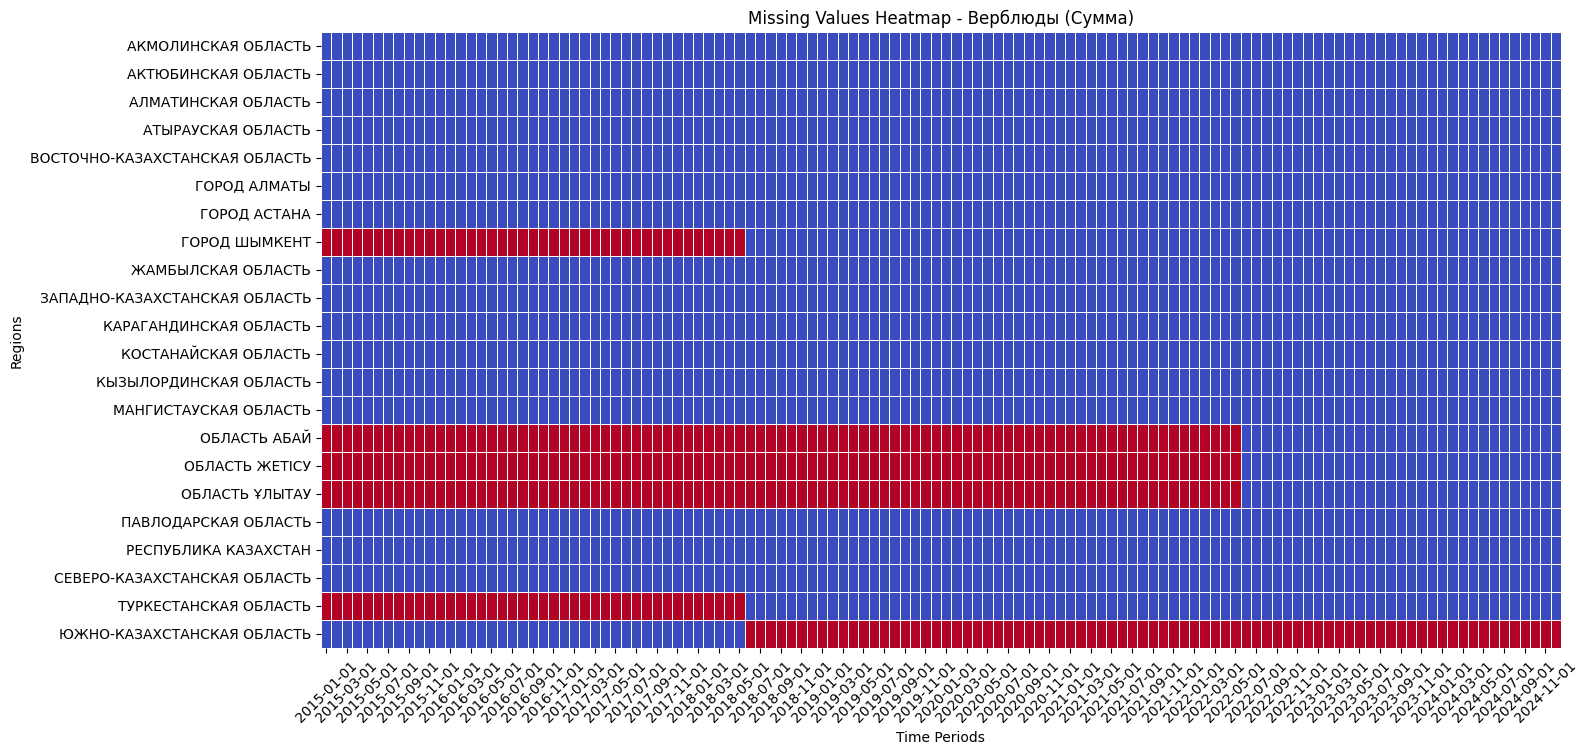

In [11]:
# Replace "нетнетнет" with NaN for easier handling
df_sum.replace("нетнетнет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_sum_numeric = df_sum.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_sum_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - Верблюды (Сумма)')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [12]:
# Convert from wide format to long format
df_sum_melted = df_sum.melt(id_vars=["Регион"], var_name="Месяц", value_name="Объем")
df_sum_melted.sample(5)

,Регион,Месяц,Объем
1211,АКТЮБИНСКАЯ ОБЛАСТЬ,2019-08-01,7.20
98,КАРАГАНДИНСКАЯ ОБЛАСТЬ,2015-05-01,3.45
650,КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ,2017-06-01,0.00
1970,КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ,2022-06-01,2.00
2271,ГОРОД АЛМАТЫ,2023-08-01,0.00


In [13]:
# Convert date column to datetime
df_sum_melted["Месяц"] = pd.to_datetime(df_sum_melted["Месяц"])

# Set index for time-series analysis
df_sum_melted = df_sum_melted.sort_values(["Регион", "Месяц"]).set_index(["Регион", "Месяц"])

df_sum_melted

Объем
Регион                     Месяц            
АКМОЛИНСКАЯ ОБЛАСТЬ        2015-01-01    0.0
                           2015-02-01    0.0
                           2015-03-01    0.4
                           2015-04-01    0.0
                           2015-05-01    0.0
...                                      ...
ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ 2024-08-01    NaN
                           2024-09-01    NaN
                           2024-10-01    NaN
                           2024-11-01    NaN
                           2024-12-01    NaN

[2640 rows x 1 columns]

In [14]:
# Replace "нет" with NaN
df_sum_melted = df_sum_melted.replace("нетнетнет", np.nan)
df_sum_melted.isna().groupby("Регион").mean() * 100

,Объем
Регион,
АКМОЛИНСКАЯ ОБЛАСТЬ,0.000000
АКТЮБИНСКАЯ ОБЛАСТЬ,0.000000
АЛМАТИНСКАЯ ОБЛАСТЬ,0.000000
АТЫРАУСКАЯ ОБЛАСТЬ,0.000000
ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,0.000000
ГОРОД АЛМАТЫ,0.000000
ГОРОД АСТАНА,0.000000
ГОРОД ШЫМКЕНТ,34.166667
ЖАМБЫЛСКАЯ ОБЛАСТЬ,0.000000


In [15]:
# Filter the df
df_shp = df[(df['Показатель'] == "Верблюды") & (df['Категория хозяйства'] == "Сельхозпредприятия")]
df_shp = df_shp.drop(columns=["Показатель", "Категория хозяйства"])
df_shp = df_shp.sort_values(by="Регион", ascending=True)

df_shp.sample(5)


,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
283,ОБЛАСТЬ ЖЕТІСУ,нет,нет,нет,нет,нет,нет,нет,нет,нет,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0
265,АКМОЛИНСКАЯ ОБЛАСТЬ,0,0,0,0,0,0,0.09,1,0,...,0,0,0,0,0,0,0,0,0,0
276,ПАВЛОДАРСКАЯ ОБЛАСТЬ,0,0,0,0.96,0,0,0,0,1.6,...,NaN,NaN,NaN,NaN,NaN,0.4,0,0,0,0
285,ОБЛАСТЬ АБАЙ,нет,нет,нет,нет,нет,нет,нет,нет,нет,...,NaN,NaN,NaN,1.68,NaN,NaN,NaN,0.7,1.4,2.7
266,АКТЮБИНСКАЯ ОБЛАСТЬ,0,1.9,1.45,3.35,0,2,0.5,NaN,0,...,0,2,0,0,0,0,0.47,0,0,0


C:\Users\Acer\AppData\Local\Temp\ipykernel_15340\2492025660.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_shp.replace("нет", np.nan, inplace=True)


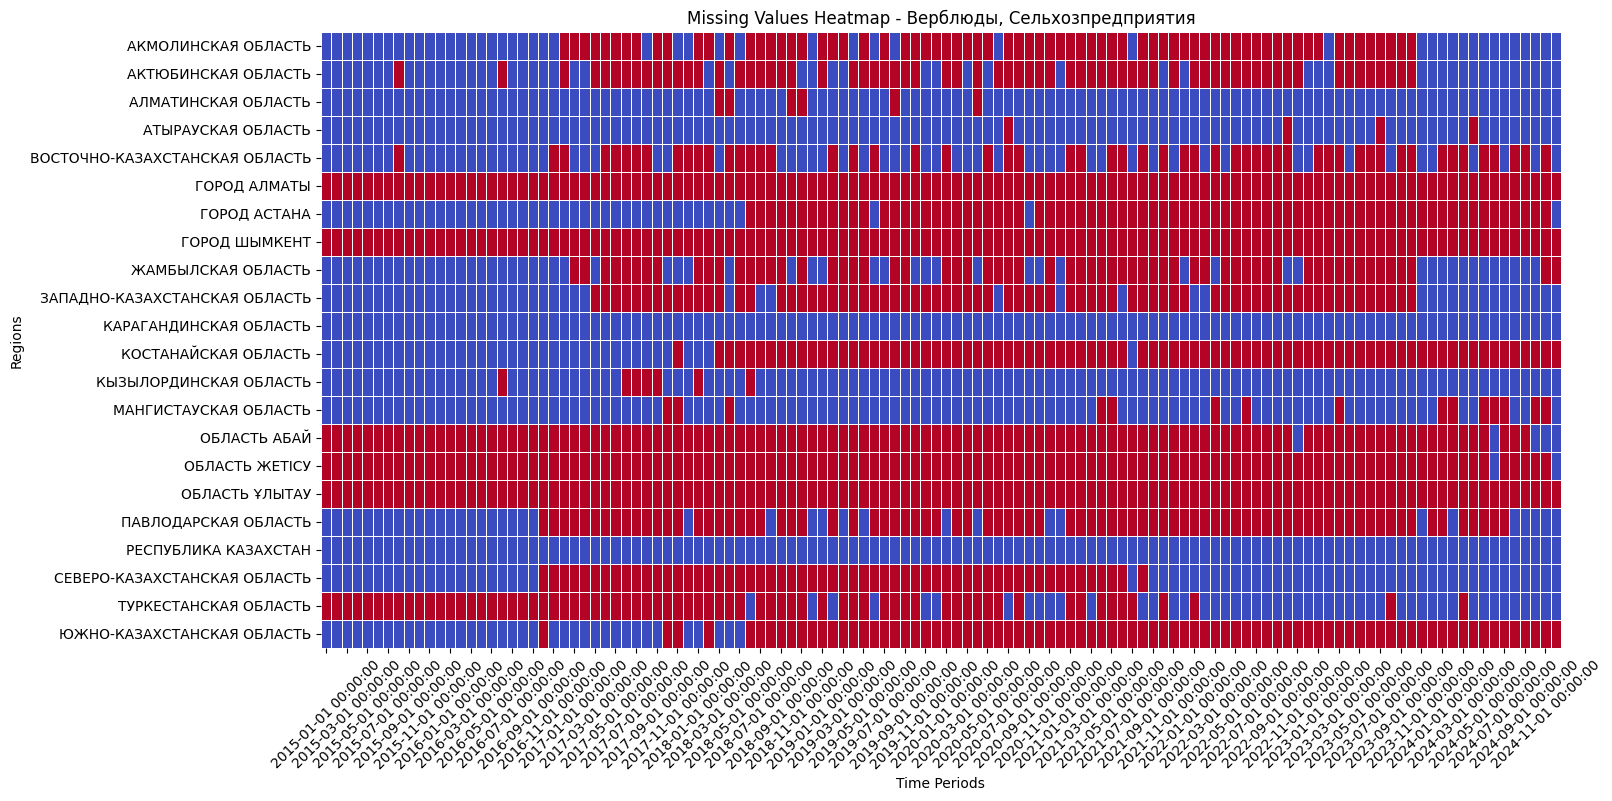

In [16]:
# Replace "нетнетнет" with NaN for easier handling
df_shp.replace("нет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_shp_numeric = df_shp.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_shp_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - Верблюды, Сельхозпредприятия')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [17]:
# Filter the df
df_kfh = df[(df['Показатель'] == "Верблюды") & (df['Категория хозяйства'] == "Крестьянские или фермерские хозяйства")]
df_kfh = df_kfh.drop(columns=["Показатель", "Категория хозяйства"])
df_kfh = df_kfh.sort_values(by="Регион", ascending=True)

df_kfh.sample(5)

,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
286,РЕСПУБЛИКА КАЗАХСТАН,179.86,124.5,206.96,92.5,209.89,247.71,66.05,139.8,179.22,...,373.6,178.4,286.8,435.7,157.8,148.5,283.4,237.9,608.2,1909.5
305,ОБЛАСТЬ ЖЕТІСУ,нет,нет,нет,нет,нет,нет,нет,нет,нет,...,0.7,NaN,NaN,0.3,NaN,2.1,0.8,NaN,1.3,0.7
292,ЖАМБЫЛСКАЯ ОБЛАСТЬ,15.6,10.18,27.79,12.3,4.33,4.14,11.38,6.3,26.59,...,19.1,6.5,4.2,7.4,6.7,2.9,16,8.2,22.9,5.8
298,ПАВЛОДАРСКАЯ ОБЛАСТЬ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
302,ГОРОД АСТАНА,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\Acer\AppData\Local\Temp\ipykernel_15340\276317303.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_kfh.replace("нет", np.nan, inplace=True)


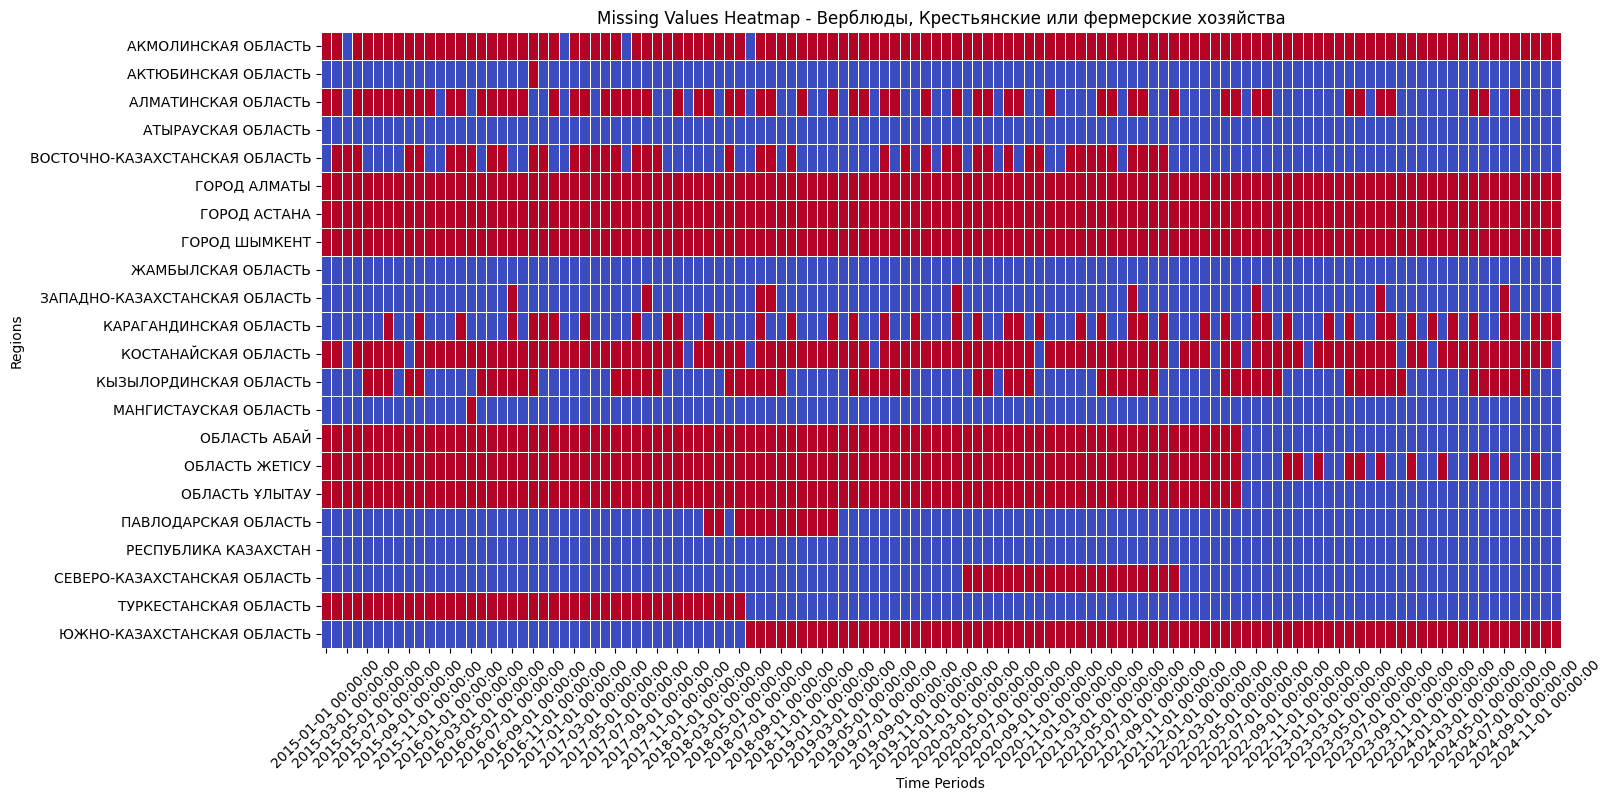

In [18]:
# Replace "нетнетнет" with NaN for easier handling
df_kfh.replace("нет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_kfh_numeric = df_kfh.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_kfh_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - Верблюды, Крестьянские или фермерские хозяйства')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [19]:
# Filter the df
df_hn = df[(df['Показатель'] == "Верблюды") & (df['Категория хозяйства'] == "Хозяйства населения")]
df_hn = df_hn.drop(columns=["Показатель", "Категория хозяйства"])
df_hn = df_hn.sort_values(by="Регион", ascending=True)

df_hn.sample(5)

,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
328,ОБЛАСТЬ ҰЛЫТАУ,нет,нет,нет,нет,нет,нет,нет,нет,нет,...,0,0,0,0,0,0,0,0,0,0
316,КОСТАНАЙСКАЯ ОБЛАСТЬ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,АКТЮБИНСКАЯ ОБЛАСТЬ,78.08,56.11,326.7,86.19,214.42,7.02,9,2.5,38.53,...,340.6,89.9,221.1,2.4,8.8,2.5,45.5,50.1,77.1,423.9
317,КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ,208.45,147.33,125.42,98.69,NaN,NaN,NaN,NaN,NaN,...,271.4,NaN,NaN,NaN,NaN,0.9,0.9,17,240.2,556.7
322,ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,0,0,0,0,0,0,0.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\Acer\AppData\Local\Temp\ipykernel_15340\969943667.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_hn.replace("нет", np.nan, inplace=True)


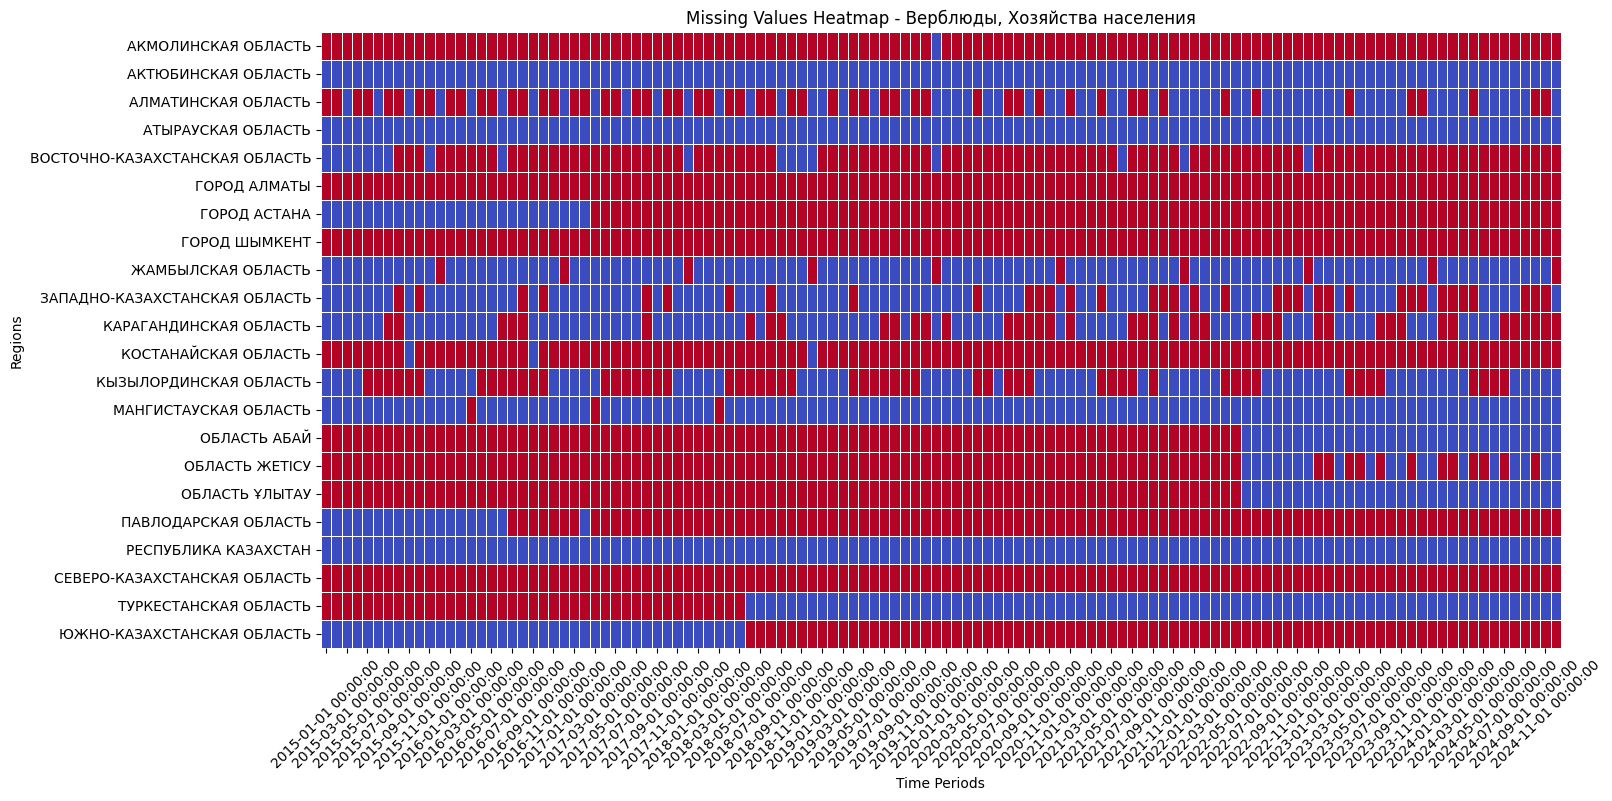

In [20]:
# Replace "нетнетнет" with NaN for easier handling
df_hn.replace("нет", np.nan, inplace=True)

# Convert all values to numeric, keeping NaNs
df_hn_numeric = df_hn.set_index("Регион").apply(pd.to_numeric, errors="coerce")

# Create heatmap: 1 for missing values, 0 for present values
missing_heatmap = df_hn_numeric.isna()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
plt.title('Missing Values Heatmap - Верблюды, Хозяйства населения')
plt.xlabel("Time Periods")
plt.ylabel("Regions")
plt.xticks(rotation=45)
plt.show()

In [21]:
df_sum_melted

Объем
Регион                     Месяц            
АКМОЛИНСКАЯ ОБЛАСТЬ        2015-01-01    0.0
                           2015-02-01    0.0
                           2015-03-01    0.4
                           2015-04-01    0.0
                           2015-05-01    0.0
...                                      ...
ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ 2024-08-01    NaN
                           2024-09-01    NaN
                           2024-10-01    NaN
                           2024-11-01    NaN
                           2024-12-01    NaN

[2640 rows x 1 columns]

In [22]:
# Reset index if needed
df_stats = df_sum_melted.reset_index()

# Calculate basic descriptive stats for each region
region_stats = df_stats.groupby("Регион")["Объем"].agg([
    "count", "min", "max", "mean", "median", "std"
]).rename(columns={
    "count": "Кол-во значений",
    "min": "Мин.",
    "max": "Макс.",
    "mean": "Среднее",
    "median": "Медиана",
    "std": "Ст. откл."
})

# Display result
display(region_stats.sort_values(by="Среднее", ascending=False))


,Кол-во значений,Мин.,Макс.,Среднее,Медиана,Ст. откл.
Регион,,,,,,
РЕСПУБЛИКА КАЗАХСТАН,120,257.35,4952.39,1158.419000,986.915,771.605119
АТЫРАУСКАЯ ОБЛАСТЬ,120,43.60,1412.20,361.228000,304.260,269.769598
МАНГИСТАУСКАЯ ОБЛАСТЬ,120,9.00,921.40,254.641333,204.845,177.206076
КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ,120,0.00,1740.77,165.302250,21.375,239.668022
ТУРКЕСТАНСКАЯ ОБЛАСТЬ,79,34.20,764.44,156.976835,116.400,118.444403
АКТЮБИНСКАЯ ОБЛАСТЬ,120,3.00,554.90,149.951000,87.640,156.565962
ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,41,43.20,348.02,142.789756,122.500,76.796629
ЖАМБЫЛСКАЯ ОБЛАСТЬ,120,5.80,109.80,31.357250,24.420,21.630991
АЛМАТИНСКАЯ ОБЛАСТЬ,120,0.00,131.80,18.744917,12.600,24.107977


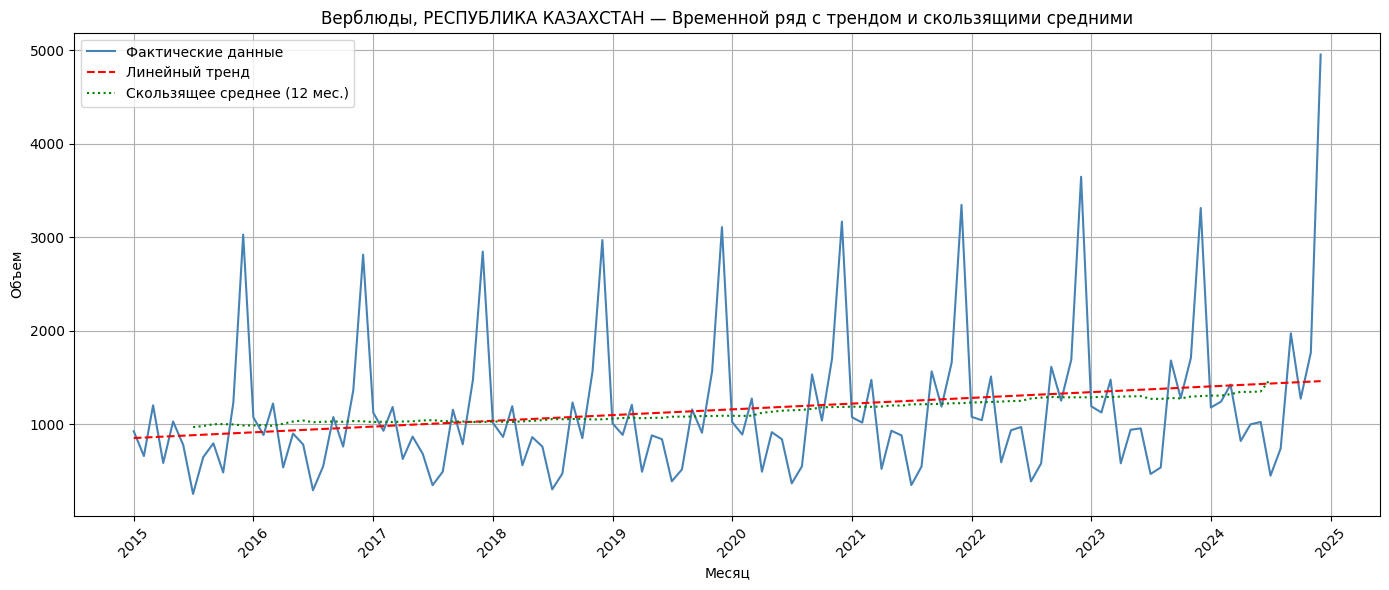

In [23]:
# Filter for national level
national_data = df_stats[df_stats["Регион"] == "РЕСПУБЛИКА КАЗАХСТАН"].copy()

# Ensure 'Месяц' is datetime
national_data["Месяц"] = pd.to_datetime(national_data["Месяц"])

# Create time index as integer (months since start)
national_data = national_data.sort_values("Месяц")
national_data["t"] = range(len(national_data))  # 0, 1, 2, ..., N

# Trend line
coeffs = np.polyfit(national_data["t"], national_data["Объем"], deg=1)
trend = np.poly1d(coeffs)

# Moving Averages
national_data["MA_12"] = national_data["Объем"].rolling(window=12, center=True).mean()

# Plot
plt.figure(figsize=(14, 6))

# Actual data
plt.plot(national_data["Месяц"], national_data["Объем"], label="Фактические данные", color="steelblue")

# Trend line
plt.plot(national_data["Месяц"], trend(national_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# Moving Averages
plt.plot(national_data["Месяц"], national_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# Labels and style
plt.title("Верблюды, РЕСПУБЛИКА КАЗАХСТАН — Временной ряд с трендом и скользящими средними")
plt.xlabel("Месяц")
plt.ylabel("Объем")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

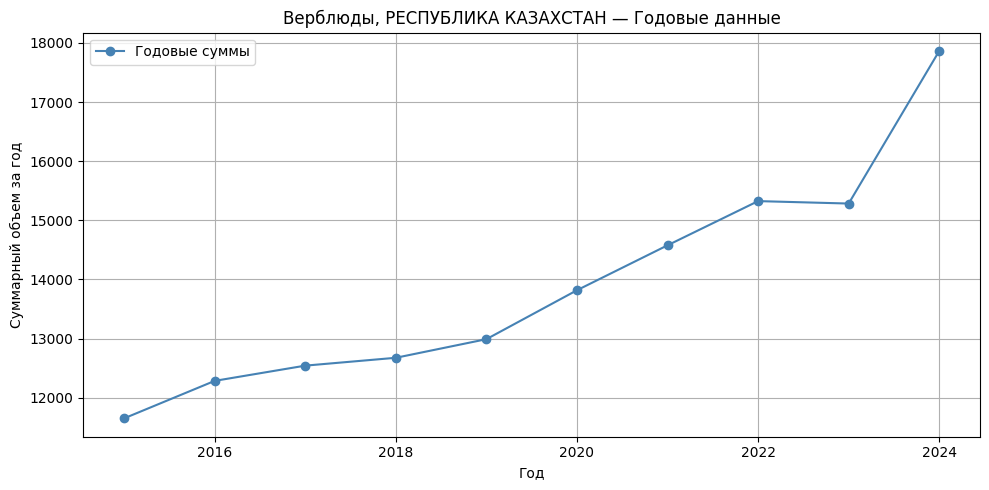

In [24]:
# Aggregate by year (sum)
national_data["Год"] = national_data["Месяц"].dt.year
annual_data = national_data.groupby("Год")["Объем"].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))

# Actual yearly data
plt.plot(annual_data["Год"], annual_data["Объем"], marker='o', label="Годовые суммы", color="steelblue")

# Labels and style
plt.title("Верблюды, РЕСПУБЛИКА КАЗАХСТАН — Годовые данные")
plt.xlabel("Год")
plt.ylabel("Суммарный объем за год")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [31]:
# # Filter for national level
# aktobe_data = df_stats[df_stats["Регион"] == "АКТЮБИНСКАЯ ОБЛАСТЬ"].copy()

# # Ensure 'Месяц' is datetime
# aktobe_data["Месяц"] = pd.to_datetime(aktobe_data["Месяц"])

# # Create time index as integer (months since start)
# aktobe_data = aktobe_data.sort_values("Месяц")
# aktobe_data["t"] = range(len(aktobe_data))  # 0, 1, 2, ..., N

# # Trend line
# coeffs = np.polyfit(aktobe_data["t"], aktobe_data["Объем"], deg=1)
# trend = np.poly1d(coeffs)

# # Moving Averages
# aktobe_data["MA_12"] = aktobe_data["Объем"].rolling(window=12, center=True).mean()

# # Plot
# plt.figure(figsize=(14, 6))

# # Actual data
# plt.plot(aktobe_data["Месяц"], aktobe_data["Объем"], label="Фактические данные", color="steelblue")

# # Trend line
# plt.plot(aktobe_data["Месяц"], trend(aktobe_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# # Moving Averages
# plt.plot(aktobe_data["Месяц"], aktobe_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# # Labels and style
# plt.title("АКТЮБИНСКАЯ ОБЛАСТЬ — Временной ряд с трендом и скользящими средними")
# plt.xlabel("Месяц")
# plt.ylabel("Объем")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

In [32]:
# # Filter for national level
# akmola_data = df_stats[df_stats["Регион"] == "АКМОЛИНСКАЯ ОБЛАСТЬ"].copy()

# # Ensure 'Месяц' is datetime
# akmola_data["Месяц"] = pd.to_datetime(akmola_data["Месяц"])

# # Create time index as integer (months since start)
# akmola_data = akmola_data.sort_values("Месяц")
# akmola_data["t"] = range(len(akmola_data))  # 0, 1, 2, ..., N

# # Trend line
# coeffs = np.polyfit(akmola_data["t"], akmola_data["Объем"], deg=1)
# trend = np.poly1d(coeffs)

# # Moving Averages
# akmola_data["MA_12"] = akmola_data["Объем"].rolling(window=12, center=True).mean()

# # Plot
# plt.figure(figsize=(14, 6))

# # Actual data
# plt.plot(akmola_data["Месяц"], akmola_data["Объем"], label="Фактические данные", color="steelblue")

# # Trend line
# plt.plot(akmola_data["Месяц"], trend(akmola_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# # Moving Averages
# plt.plot(akmola_data["Месяц"], akmola_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# # Labels and style
# plt.title("АКМОЛИНСКАЯ ОБЛАСТЬ — Временной ряд с трендом и скользящими средними")
# plt.xlabel("Месяц")
# plt.ylabel("Объем")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

In [33]:
# # Filter for national level
# kyzylorda_data = df_stats[df_stats["Регион"] == "КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ"].copy()

# # Ensure 'Месяц' is datetime
# kyzylorda_data["Месяц"] = pd.to_datetime(kyzylorda_data["Месяц"])

# # Create time index as integer (months since start)
# kyzylorda_data = kyzylorda_data.sort_values("Месяц")
# kyzylorda_data["t"] = range(len(kyzylorda_data))  # 0, 1, 2, ..., N

# # Trend line
# coeffs = np.polyfit(kyzylorda_data["t"], kyzylorda_data["Объем"], deg=1)
# trend = np.poly1d(coeffs)

# # Moving Averages
# kyzylorda_data["MA_12"] = kyzylorda_data["Объем"].rolling(window=12, center=True).mean()

# # Plot
# plt.figure(figsize=(14, 6))

# # Actual data
# plt.plot(kyzylorda_data["Месяц"], kyzylorda_data["Объем"], label="Фактические данные", color="steelblue")

# # Trend line
# plt.plot(kyzylorda_data["Месяц"], trend(kyzylorda_data["t"]), linestyle="--", color="red", label="Линейный тренд")

# # Moving Averages
# plt.plot(kyzylorda_data["Месяц"], kyzylorda_data["MA_12"], linestyle=":", color="green", label="Скользящее среднее (12 мес.)")

# # Labels and style
# plt.title("КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ — Временной ряд с трендом и скользящими средними")
# plt.xlabel("Месяц")
# plt.ylabel("Объем")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()